# Wholesale Customer Segmentation with K-Means & PCA
 
It is an unsupervised machine learning algorithm used for clustering data into distinct groups It automatically identifies patterns in the data without predefined labels, organizing data points into K clusters based on their similarities. This makes it useful for discovering hidden structures in large datasets.

In [1]:
# import the libs
import pandas as pd              # For working with datasets (DataFrames)
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
from sklearn.cluster import KMeans  # Importing the actual KMeans algorithm from sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('Wholesale data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,1,16291,0,1478,0,3306,5918
1,2,1,11826,3611,12866,219,4735,0
2,1,3,29291,9118,0,0,0,0
3,1,3,3459,11231,0,1542,3700,0
4,1,2,26534,0,0,9276,13558,132


In [4]:
#Data Understanding 

data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.513636,1.909091,14462.006818,7037.950000,8701.354545,4136.136364,4010.843182,2098.429545
std,0.500383,0.816074,11424.551850,6257.491238,7859.589728,3948.235859,3815.308654,2059.128920
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,4382.000000,1293.750000,1250.000000,176.500000,196.500000,0.000000
50%,2.000000,2.000000,13774.500000,6265.000000,7347.500000,3545.000000,3233.500000,1805.500000
75%,2.000000,3.000000,22085.250000,11220.500000,14346.250000,6785.500000,6294.000000,3400.000000
max,2.000000,3.000000,51997.000000,28736.000000,32877.000000,18622.000000,18124.000000,8582.000000


In [21]:
#Preprocessing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pd.DataFrame(data_scaled).describe()



,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-9.689219e-17,-8.478067e-17,-7.266914e-17,1.614870e-17,-8.074349e-18,-8.074349e-17,4.037175e-17,2.624164e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-1.027655e+00,-1.115249e+00,-1.267312e+00,-1.126004e+00,-1.108361e+00,-1.048783e+00,-1.052447e+00,-1.020246e+00
25%,-1.027655e+00,-1.115249e+00,-8.833153e-01,-9.190167e-01,-9.491382e-01,-1.004029e+00,-1.000885e+00,-1.020246e+00
50%,9.730892e-01,1.115249e-01,-6.024651e-02,-1.236646e-01,-1.724512e-01,-1.498921e-01,-2.039751e-01,-1.424209e-01
75%,9.730892e-01,1.338299e+00,6.680280e-01,6.691677e-01,7.190351e-01,6.717885e-01,5.991011e-01,6.328171e-01
max,9.730892e-01,1.338299e+00,3.289207e+00,3.471479e+00,3.079444e+00,3.673122e+00,3.703297e+00,3.152280e+00


In [22]:
#KMeans Training

kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(data_scaled)
kmeans.inertia_

3064.1965300692245

In [23]:
#Elbow Method implementation

wcss = [] #Within-Cluster Sum of Squares (WCSS

for cluster in range(1, 21):
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)


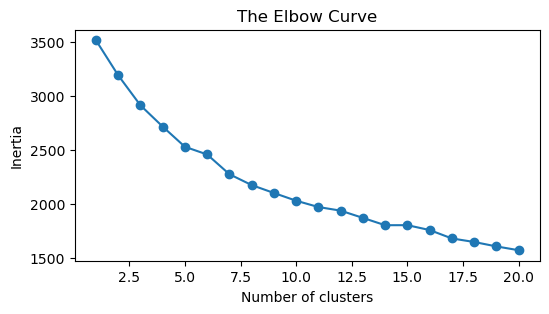

In [24]:
#Elbow Curve Plot

plt.figure(figsize=(6, 3))
plt.plot(range(1, 21), wcss, marker='o')
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


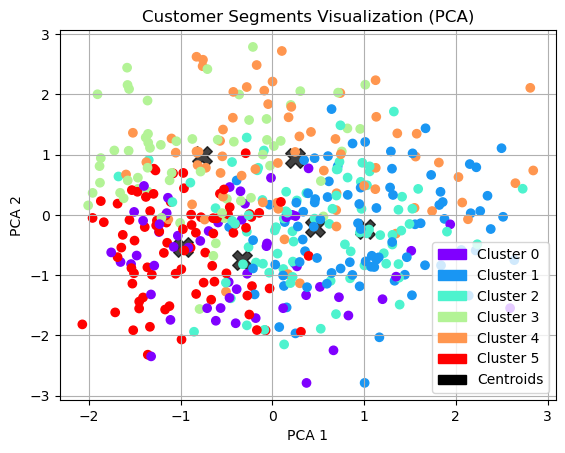

In [59]:
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

labels = kmeans.labels_

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)
centers = pca.transform(kmeans.cluster_centers_)

# Plot centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='X', label='Centroids')

# Plot clustered data
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='rainbow')

# Custom legend for clusters
labels_unique = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels_unique)))
patches = [mpatches.Patch(color=colors[i], label=f'Cluster {i}') for i in range(len(labels_unique))]
plt.legend(handles=patches + [mpatches.Patch(color='black', label='Centroids')])

# Title and axis
plt.title('Customer Segments Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [26]:
# Build the model with the 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

df = pd.DataFrame(data_scaled)
df.head()


,0,1,2,3,4,5,6,7
0,-1.027655,-1.115249,0.160275,-1.126004,-0.920096,-1.048783,-0.184951,1.857056
1,0.973089,-1.115249,-0.230994,-0.548279,0.530484,-0.993253,0.190019,-1.020246
2,-1.027655,1.338299,1.299471,0.332788,-1.108361,-1.048783,-1.052447,-1.020246
3,-1.027655,1.338299,-0.964198,0.670848,-1.108361,-0.657785,-0.081565,-1.020246
4,-1.027655,0.111525,1.057874,-1.126004,-1.108361,1.303295,2.505177,-0.956068


In [27]:
df['cluster'] = pred
df.head()

,0,1,2,3,4,5,6,7,cluster
0,-1.027655,-1.115249,0.160275,-1.126004,-0.920096,-1.048783,-0.184951,1.857056,3
1,0.973089,-1.115249,-0.230994,-0.548279,0.530484,-0.993253,0.190019,-1.020246,1
2,-1.027655,1.338299,1.299471,0.332788,-1.108361,-1.048783,-1.052447,-1.020246,5
3,-1.027655,1.338299,-0.964198,0.670848,-1.108361,-0.657785,-0.081565,-1.020246,2
4,-1.027655,0.111525,1.057874,-1.126004,-1.108361,1.303295,2.505177,-0.956068,0


In [28]:
df.tail()

,0,1,2,3,4,5,6,7,cluster
435,0.973089,-1.115249,0.411161,-0.932736,0.261080,-0.950146,3.073799,-0.483487,1
436,0.973089,1.338299,-1.105721,-1.126004,0.239298,0.972137,1.332772,-0.378469,2
437,0.973089,-1.115249,-0.437452,-0.009591,0.801289,-1.048783,-1.052447,0.430074,1
438,-1.027655,0.111525,0.101037,-0.069108,-0.561145,0.266210,0.506736,-0.007988,5
439,-1.027655,-1.115249,-1.267312,0.243353,-1.108361,-0.468117,-1.052447,1.944571,3


In [29]:
df['cluster'].value_counts()


cluster
1    89
5    84
2    84
4    69
3    60
0    54
Name: count, dtype: int64

In [46]:
def get_cluster_prediction():
    try:
        Channel = int(input("Enter Channel (e.g., 1, 2): "))
        Region = int(input("Enter Region (e.g., 1, 2, 3): "))
        Fresh = float(input("Enter annual spending on Fresh products: "))
        Milk = float(input("Enter annual spending on Milk: "))
        Grocery = float(input("Enter annual spending on Grocery: "))
        Frozen = float(input("Enter annual spending on Frozen products: "))
        Detergents_Paper = float(input("Enter annual spending on Detergents_Paper: "))
        Delicassen = float(input("Enter annual spending on Delicassen: "))

        user_data = np.array([[Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]])
        user_data_scaled = scaler.transform(user_data)
        cluster = kmeans.predict(user_data_scaled)

        cluster_labels = {
            0: "High-spending customers",
            1: "Average urban customers",
            2: "Low-spending customers",
            3: "Wholesale customers",
            4: "Online Retailers"
        }

        print(f"\nThe customer belongs to cluster {cluster[0]}: {cluster_labels.get(cluster[0], 'Unknown')}")
        
    except ValueError:
        print("\n❌ Invalid input! Please enter numeric values.")
        return False  # Return a flag to re-prompt

    return True  # Input successful


In [47]:
while True:
    get_cluster_prediction()
    again = input("Do you want to classify another customer? (y/n): ")
    if again.lower() != 'y':
        break

Enter Channel (e.g., 1, 2):  1
Enter Region (e.g., 1, 2, 3):  2
Enter annual spending on Fresh products:  3
Enter annual spending on Milk:  4
Enter annual spending on Grocery:  5
Enter annual spending on Frozen products:  6
Enter annual spending on Detergents_Paper:  



❌ Invalid input! Please enter numeric values.


Do you want to classify another customer? (y/n):  y
Enter Channel (e.g., 1, 2):  1
Enter Region (e.g., 1, 2, 3):  2
Enter annual spending on Fresh products:  3
Enter annual spending on Milk:  4
Enter annual spending on Grocery:  5
Enter annual spending on Frozen products:  6
Enter annual spending on Detergents_Paper:  7
Enter annual spending on Delicassen:  8



The customer belongs to cluster 3: Wholesale customers


Do you want to classify another customer? (y/n):  n


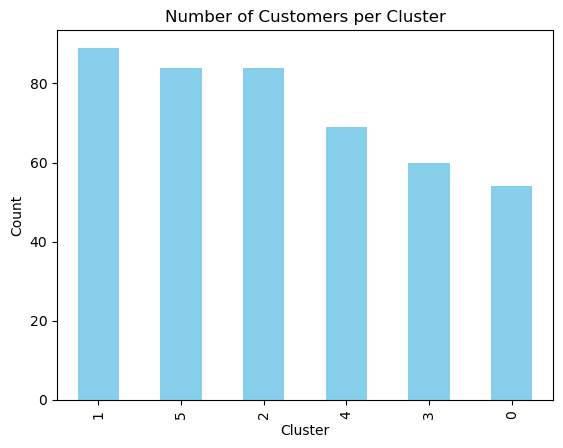

In [53]:
#Bar Chart of Cluster Sizes

df['cluster'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [54]:
#Silhouette Score

from sklearn.metrics import silhouette_score
score = silhouette_score(data_scaled, pred)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.10


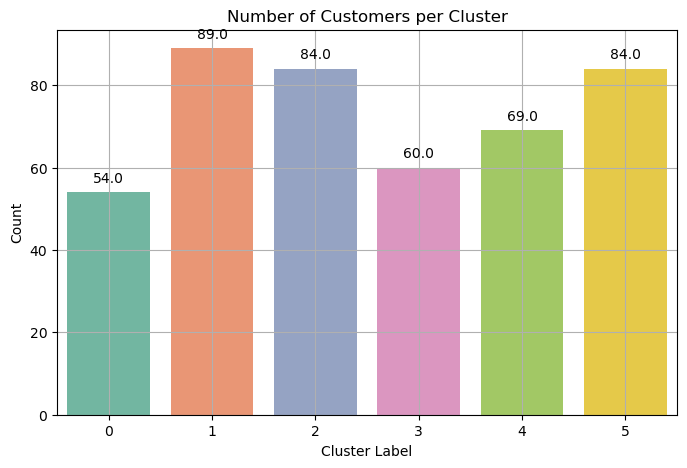

In [67]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['cluster'].astype(int), palette='Set2')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.grid(True)

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()


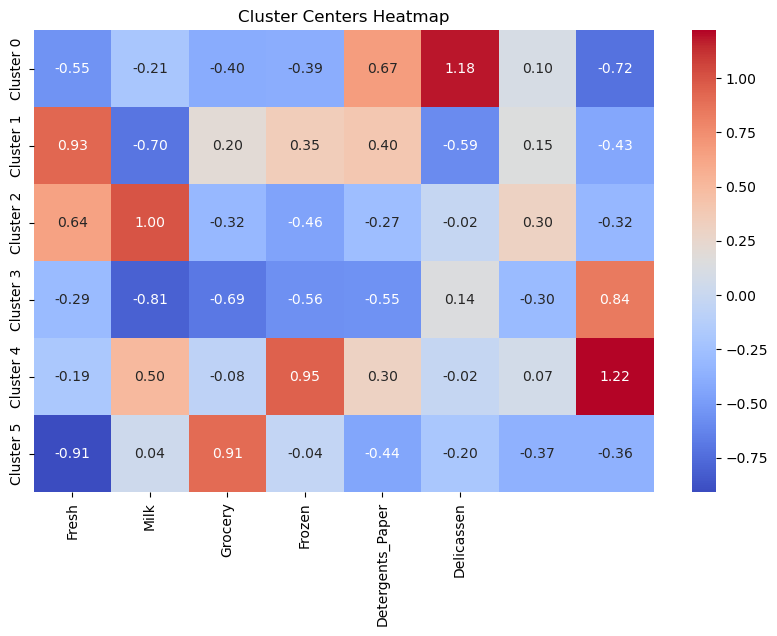

In [66]:
# Heatmap of Cluster Centers

plt.figure(figsize=(10, 6))
sns.heatmap(kmeans.cluster_centers_, cmap='coolwarm', annot=True, fmt=".2f",
            yticklabels=[f'Cluster {i}' for i in range(kmeans.n_clusters)],
            xticklabels=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
plt.title('Cluster Centers Heatmap')
plt.show()


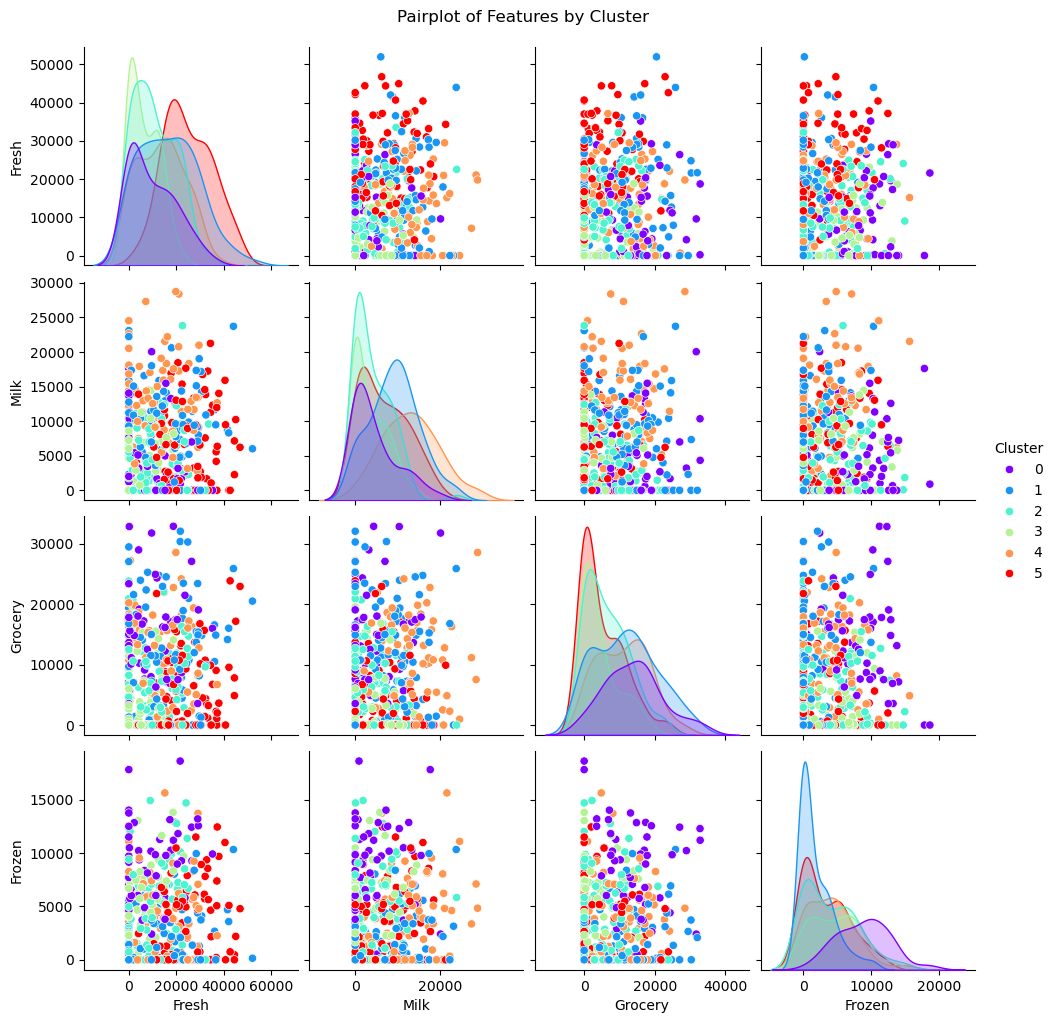

In [74]:
# Pair Plot

# Append cluster labels for coloring
df_original = pd.DataFrame(data, columns=['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
df_original['Cluster'] = labels

sns.pairplot(df_original[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Cluster']], hue='Cluster', palette='rainbow')
plt.suptitle('Pairplot of Features by Cluster', y=1.02)
plt.show()


In [77]:
print(cluster_means.columns)
cluster_means.columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Channel', 'Region']


Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='object')


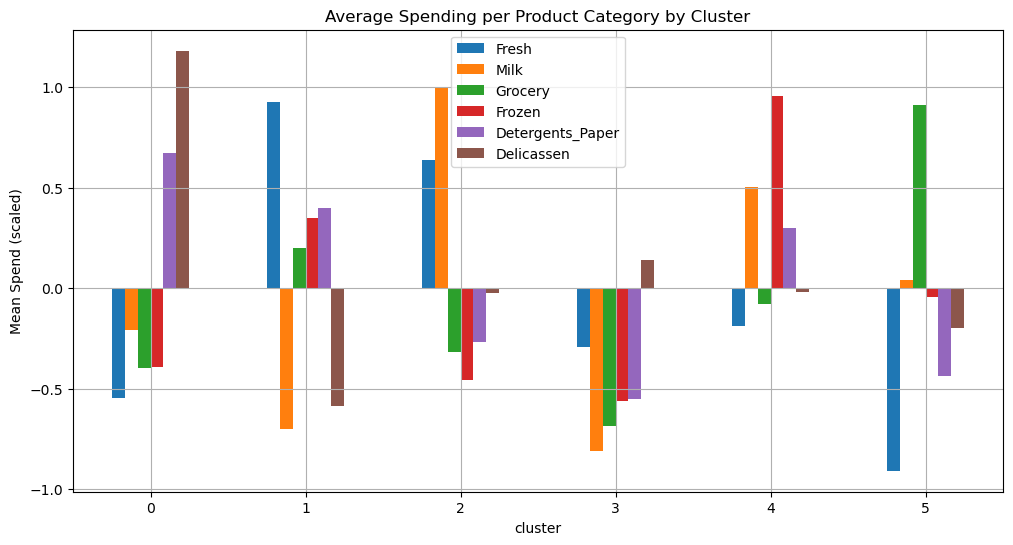

In [79]:
cluster_means[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].plot(kind='bar', figsize=(12, 6))
plt.title('Average Spending per Product Category by Cluster')
plt.ylabel('Mean Spend (scaled)', rotation=90)
plt.xticks(ticks=cluster_means.index, labels=cluster_means.index)
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


## 📌 Conclusion

In this project, we successfully implemented **K-Means Clustering** to segment wholesale customers based on their annual spending behavior across six product categories. By standardizing the data, selecting the optimal number of clusters using the **Elbow Method**, and applying **PCA** for 2D visualization, we gained meaningful insights into customer groups.

Each cluster represented a distinct spending pattern:

- 🔹 Some clusters showed **high spending across all categories** (likely wholesale buyers)
- 🔹 Others reflected **low or average spending** (possibly retail or occasional buyers)

We also evaluated the cluster quality using the **Silhouette Score**, and visualized average spending trends per cluster, making the model interpretable and practical for business use.

This unsupervised learning approach can help businesses:
- ✅ Identify customer segments
- ✅ Tailor marketing strategies
- ✅ Optimize resource allocation

> 🔄 *Future improvements can include experimenting with other clustering algorithms like DBSCAN or Hierarchical Clustering, or deploying the model using a simple Streamlit interface for business users.*
